<a href="https://colab.research.google.com/github/DJ1070/Deep_Learning_Handwriting/blob/main/Hand_Writing_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mnist dataset : https://keras.io/api/datasets/mnist/

In [3]:
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Sample From The Dataset** 

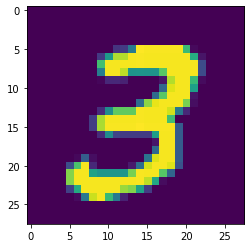

In [6]:
plt.imshow(x_train[7]) # 28 X 28 images

In [7]:
y_train[7]

3

# "Translation" Of The Pictures Into Grayscale Values

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

**Sample Of The First Digit In The Dataset**

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Flatten: Used To Convert N-Dimensional Arrays to 1D-Arrays




In [10]:
model = models.Sequential(
    [
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(128, activation = 'relu'),
    #layers.Dropout(0.2),
    layers.Dense(128, activation = 'relu'),
    #layers.Dropout(0.2),
    layers.Dense(128, activation = 'relu'),
    #layers.Dropout(0.2),
    layers.Dense(10, activation = 'softmax' )
    ]
)

# Model Definition With Dropout Rate, Optimizer, sparse_categorical_crossentropy

In [12]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',  # binary_crossentropy, categorical_crossentropy
    metrics = ['accuracy']
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


# Fitting / Training - But Without The Necessary Validation Split 

In [14]:
model.fit(
    x_train, y_train,
    epochs = 50,
    batch_size = 64
)

Epoch 1/50
938/938 [==============================] - 5s 2ms/step - loss: 0.4617 - accuracy: 0.8635
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1063 - accuracy: 0.9675
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0698 - accuracy: 0.9791
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0542 - accuracy: 0.9820
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0397 - accuracy: 0.9866
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0326 - accuracy: 0.9890
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 8/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0259 - accuracy: 0.9913
Epoch 9/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0248 - accuracy: 0.9915
Epoch 10/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0160 - accuracy: 0.9951

**Loss And Accuracy**

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1345 - accuracy: 0.9813


[0.134455606341362, 0.9812999963760376]

**Nice, But Not Good Enough Yet.**

# Fitting / Training - Now **With** The Necessary Validation Split

In [16]:
model.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 128,
    validation_split = 0.15
)

Epoch 1/20
399/399 [==============================] - 1s 3ms/step - loss: 8.7157e-04 - accuracy: 0.9996 - val_loss: 3.5849e-04 - val_accuracy: 0.9998
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 7.6337e-05 - accuracy: 1.0000 - val_loss: 2.3202e-04 - val_accuracy: 0.9999
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 2.6980e-05 - accuracy: 1.0000 - val_loss: 1.9614e-04 - val_accuracy: 0.9999
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 2.0302e-05 - accuracy: 1.0000 - val_loss: 1.7564e-04 - val_accuracy: 0.9999
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 1.6367e-05 - accuracy: 1.0000 - val_loss: 1.5763e-04 - val_accuracy: 0.9999
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 1.3456e-05 - accuracy: 1.0000 - val_loss: 1.4534e-04 - val_accuracy: 0.9999
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 1.1166e-05 - accuracy: 1.0

In [17]:
history = model.fit(
    x_train, y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.15
)

Epoch 1/10
399/399 [==============================] - 1s 3ms/step - loss: 7.4102e-07 - accuracy: 1.0000 - val_loss: 6.8990e-05 - val_accuracy: 1.0000
Epoch 2/10
399/399 [==============================] - 1s 3ms/step - loss: 6.0429e-07 - accuracy: 1.0000 - val_loss: 6.6967e-05 - val_accuracy: 1.0000
Epoch 3/10
399/399 [==============================] - 1s 3ms/step - loss: 4.9187e-07 - accuracy: 1.0000 - val_loss: 6.5549e-05 - val_accuracy: 1.0000
Epoch 4/10
399/399 [==============================] - 1s 3ms/step - loss: 4.0036e-07 - accuracy: 1.0000 - val_loss: 6.3961e-05 - val_accuracy: 1.0000
Epoch 5/10
399/399 [==============================] - 1s 3ms/step - loss: 3.2527e-07 - accuracy: 1.0000 - val_loss: 6.2728e-05 - val_accuracy: 1.0000
Epoch 6/10
399/399 [==============================] - 1s 3ms/step - loss: 2.6467e-07 - accuracy: 1.0000 - val_loss: 6.1049e-05 - val_accuracy: 1.0000
Epoch 7/10
399/399 [==============================] - 1s 3ms/step - loss: 2.1481e-07 - accuracy: 1.0

In [18]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,7.410188e-07,1.0,0.000069,1.0
1,6.042898e-07,1.0,0.000067,1.0
2,4.918714e-07,1.0,0.000066,1.0
3,4.003556e-07,1.0,0.000064,1.0
4,3.252651e-07,1.0,0.000063,1.0
5,2.646745e-07,1.0,0.000061,1.0
6,2.148095e-07,1.0,0.000059,1.0
7,1.743988e-07,1.0,0.000056,1.0
8,1.412547e-07,1.0,0.000054,1.0
9,1.146458e-07,1.0,0.000053,1.0


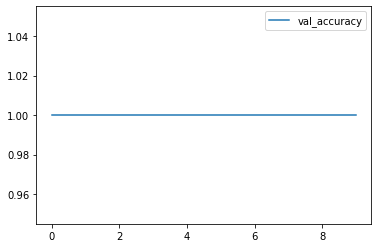

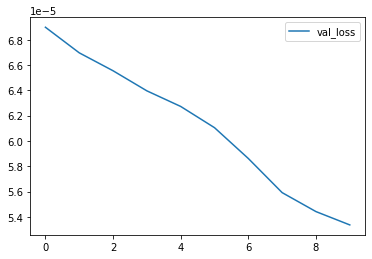

In [19]:
df.plot(y = 'val_accuracy')
df.plot(y = 'val_loss')

In [20]:
y = model.predict(x_test[0:1])

In [21]:
y

array([[4.9421073e-26, 7.0085466e-26, 2.4435277e-25, 1.2551065e-19,
        5.6638527e-22, 2.6037214e-26, 1.7012615e-34, 1.0000000e+00,
        5.4625636e-22, 6.2625736e-22]], dtype=float32)

In [22]:
y.shape

(1, 10)

In [23]:
tf.argmax(y, axis=-1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>

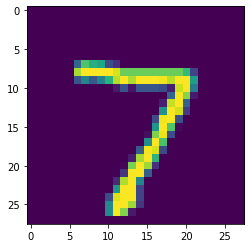

In [24]:
plt.imshow(x_test[0])

# Now With CallBacks: Callbacks Prevent The System From "Overlearning" Which Leads To Worse Results And An Excess Of Computing Ressources

In [25]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

model.fit(
    x_train, y_train,
    epochs = 30,
    batch_size = 128,
    validation_split = .15,
    callbacks = [EarlyStopping(patience= 3)]
)

Epoch 1/30
399/399 [==============================] - 1s 3ms/step - loss: 9.2691e-08 - accuracy: 1.0000 - val_loss: 5.2609e-05 - val_accuracy: 1.0000
Epoch 2/30
399/399 [==============================] - 1s 3ms/step - loss: 7.5361e-08 - accuracy: 1.0000 - val_loss: 5.0924e-05 - val_accuracy: 1.0000
Epoch 3/30
399/399 [==============================] - 1s 3ms/step - loss: 6.1355e-08 - accuracy: 1.0000 - val_loss: 5.1027e-05 - val_accuracy: 1.0000
Epoch 4/30
399/399 [==============================] - 1s 3ms/step - loss: 4.9839e-08 - accuracy: 1.0000 - val_loss: 5.0661e-05 - val_accuracy: 1.0000
Epoch 5/30
399/399 [==============================] - 1s 3ms/step - loss: 4.0592e-08 - accuracy: 1.0000 - val_loss: 5.1561e-05 - val_accuracy: 1.0000
Epoch 6/30
399/399 [==============================] - 1s 3ms/step - loss: 3.3107e-08 - accuracy: 1.0000 - val_loss: 5.1727e-05 - val_accuracy: 1.0000
Epoch 7/30
399/399 [==============================] - 1s 3ms/step - loss: 2.7077e-08 - accuracy: 1.0

**The System Stopped "Learning" After The Results Didn't Grow Better For 3 Epochs ("Patience = 3")**

In [ ]:
#callbacks = [tf.keras.callbacks.EarlyStopping()]  patience 
# Arguments: 1) patience = 0 (def), 2) monitor = 'val_loss' (default) 3) min_delta = 0.01 (measure of improvement), 4) mode = 'auto'. 

# ModelCheckpoint Returns To The Kept Best Result After A Defined Number Of "Patiences"

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

path = 'hamdwriting/model_weights'
checkpoint = ModelCheckpoint(filepath = path,
                             frequency = 'epoch',
                             save_weights_only = True,
                             save_best_only = True,
                             verbose =1
                          )

model.fit(
    x_train, y_train,
    epochs = 15,
    batch_size = 128,
    validation_split = .15,
    callbacks = [EarlyStopping(patience= 2), checkpoint]


)

Epoch 1/15
399/399 [==============================] - 1s 3ms/step - loss: 2.2192e-08 - accuracy: 1.0000 - val_loss: 5.1972e-05 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.00005, saving model to hamdwriting/model_weights
Epoch 2/15
399/399 [==============================] - 1s 3ms/step - loss: 1.8185e-08 - accuracy: 1.0000 - val_loss: 5.2414e-05 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 0.00005
Epoch 3/15
399/399 [==============================] - 1s 3ms/step - loss: 1.4927e-08 - accuracy: 1.0000 - val_loss: 4.9971e-05 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00005 to 0.00005, saving model to hamdwriting/model_weights
Epoch 4/15
399/399 [==============================] - 1s 3ms/step - loss: 1.2332e-08 - accuracy: 1.0000 - val_loss: 5.0807e-05 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.00005
Epoch 5/15
399/399 [==============================] - 1s 3ms/step - loss: 1.0226e-08 - accuracy: 1.000

**The 3rd Epoch Brought The Best Results With The val_loss < 5. With patience = 2 The Computing Was Stopped After The 5th Epoch.** 

In [27]:
! ls hamdwriting

checkpoint  model_weights.data-00000-of-00001  model_weights.index


In [28]:
! model_weights.data-00000-of-00001

/bin/bash: model_weights.data-00000-of-00001: command not found


In [29]:
model.load_weights(path)

# Already Saved Model In Tensorflow: Transfer Learning

In [30]:
from tensorflow.keras.applications import InceptionV3

In [31]:
model = InceptionV3()

96116736/96112376 [==============================] - 1s 0us/step


In [32]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________